In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('deliveries.csv')
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
df.shape

(260920, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92042 entries, 0 to 92041
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          92042 non-null  int64  
 1   inning            92042 non-null  int64  
 2   batting_team      92042 non-null  object 
 3   bowling_team      92042 non-null  object 
 4   over              92042 non-null  int64  
 5   ball              92042 non-null  int64  
 6   batter            92042 non-null  object 
 7   bowler            92042 non-null  object 
 8   non_striker       92041 non-null  object 
 9   batsman_runs      92041 non-null  float64
 10  extra_runs        92041 non-null  float64
 11  total_runs        92041 non-null  float64
 12  extras_type       5096 non-null   object 
 13  is_wicket         92041 non-null  float64
 14  player_dismissed  4552 non-null   object 
 15  dismissal_kind    4552 non-null   object 
 16  fielder           3271 non-null   object

In [ ]:
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,92042.000000,92042.000000,92042.000000,92042.000000,92041.000000,92041.000000,92041.000000,92041.000000
mean,473544.187784,1.483594,9.144401,3.618587,1.191469,0.070838,1.262307,0.049456
std,89867.784927,0.501578,5.672185,1.809299,1.570233,0.357178,1.560771,0.216820
min,335982.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,392223.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,501216.000000,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,548351.000000,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,598063.000000,4.000000,19.000000,10.000000,6.000000,5.000000,7.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis (EDA)

# Total No.of Matches, bastmen, bowlers, teams played

In [ ]:
# Total number of unique matches
total_matches = df['match_id'].nunique()

# Total number of unique batters
total_batters = df['batter'].nunique()

# Total number of unique bowlers
total_bowlers = df['bowler'].nunique()

# Unique teams (from both batting and bowling sides)
batting_teams = df['batting_team'].unique()
bowling_teams = df['bowling_team'].unique()
all_teams = sorted(set(batting_teams).union(set(bowling_teams)))

# Total number of unique teams
total_teams = len(all_teams)

# Print summary
print("📊 IPL Summary:")
print(f"✅ Total Matches Played: {total_matches}")
print(f"👤 Total Unique Batters: {total_batters}")
print(f"🎯 Total Unique Bowlers: {total_bowlers}")
print(f"🏏 Total Teams Played: {total_teams}")
print("📝 Team Names:")
for team in all_teams:
    print(f" - {team}")


📊 IPL Summary:
✅ Total Matches Played: 1095
👤 Total Unique Batters: 673
🎯 Total Unique Bowlers: 530
🏏 Total Teams Played: 19
📝 Team Names:
 - Chennai Super Kings
 - Deccan Chargers
 - Delhi Capitals
 - Delhi Daredevils
 - Gujarat Lions
 - Gujarat Titans
 - Kings XI Punjab
 - Kochi Tuskers Kerala
 - Kolkata Knight Riders
 - Lucknow Super Giants
 - Mumbai Indians
 - Pune Warriors
 - Punjab Kings
 - Rajasthan Royals
 - Rising Pune Supergiant
 - Rising Pune Supergiants
 - Royal Challengers Bangalore
 - Royal Challengers Bengaluru
 - Sunrisers Hyderabad


# TOP BATSMEN

In [ ]:
# ✅ Top 10 Run Scorers
top_run_scorers = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# ✅ Print Results
print("🏏 Top 10 Run Scorers:")
for player, runs in top_run_scorers.items():
    print(f" - {player}: {runs} runs")

🏏 Top 10 Run Scorers:
 - V Kohli: 8014 runs
 - S Dhawan: 6769 runs
 - RG Sharma: 6630 runs
 - DA Warner: 6567 runs
 - SK Raina: 5536 runs
 - MS Dhoni: 5243 runs
 - AB de Villiers: 5181 runs
 - CH Gayle: 4997 runs
 - RV Uthappa: 4954 runs
 - KD Karthik: 4843 runs


<ipython-input-112-2950283433>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_run_scorers_df, x='Runs', y='Player', palette='magma', edgecolor='.3')
<ipython-input-112-2950283433>:15: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


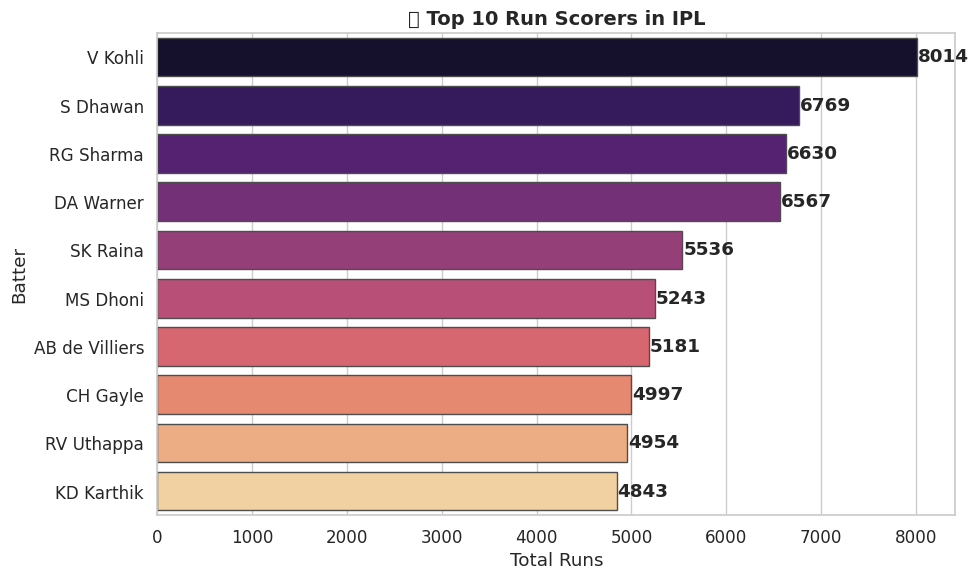

In [ ]:
top_run_scorers_df = top_run_scorers.reset_index()
top_run_scorers_df.columns = ['Player', 'Runs']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_run_scorers_df, x='Runs', y='Player', palette='magma', edgecolor='.3')

# Annotate values
for i, row in top_run_scorers_df.iterrows():
    plt.text(row['Runs'] + 10, i, f"{row['Runs']}", va='center', fontweight='bold')

plt.title("🏏 Top 10 Run Scorers in IPL", fontsize=14, fontweight='bold')
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

# TOP BOWLERS

<ipython-input-113-3206331367>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_wicket_takers_df, x='Wickets', y='Bowler', palette='flare', edgecolor='.3')
<ipython-input-113-3206331367>:15: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


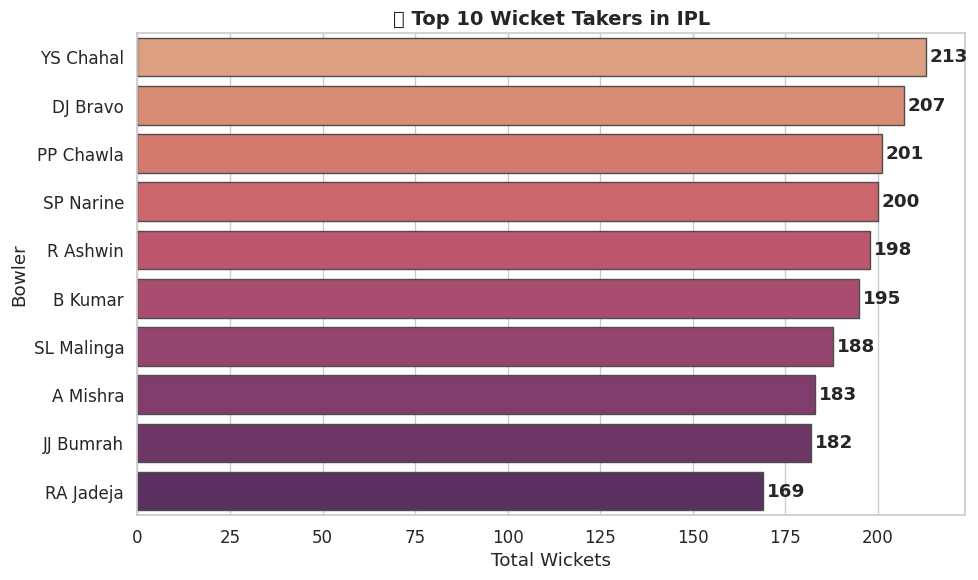

In [ ]:
top_wicket_takers_df = top_wicket_takers.reset_index()
top_wicket_takers_df.columns = ['Bowler', 'Wickets']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_wicket_takers_df, x='Wickets', y='Bowler', palette='flare', edgecolor='.3')

# Annotate values
for i, row in top_wicket_takers_df.iterrows():
    plt.text(row['Wickets'] + 1, i, f"{row['Wickets']}", va='center', fontweight='bold')

plt.title("🎯 Top 10 Wicket Takers in IPL", fontsize=14, fontweight='bold')
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

# Total No.of Boundaries

In [ ]:
# Count total number of 4s
total_fours = df[df['batsman_runs'] == 4].shape[0]

# Count total number of 6s
total_sixes = df[df['batsman_runs'] == 6].shape[0]

# Print the results
print("🏏 Total Boundaries Summary")
print(f"🔹 Total Fours (4s): {total_fours}")
print(f"🔸 Total Sixes (6s): {total_sixes}")
print(f"🎯 Total Boundaries: {total_fours + total_sixes}")

🏏 Total Boundaries Summary
🔹 Total Fours (4s): 29850
🔸 Total Sixes (6s): 13051
🎯 Total Boundaries: 42901


<ipython-input-107-1414133059>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=boundary_data, x='Type', y='Count', palette='pastel', edgecolor=".3")
<ipython-input-107-1414133059>:18: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


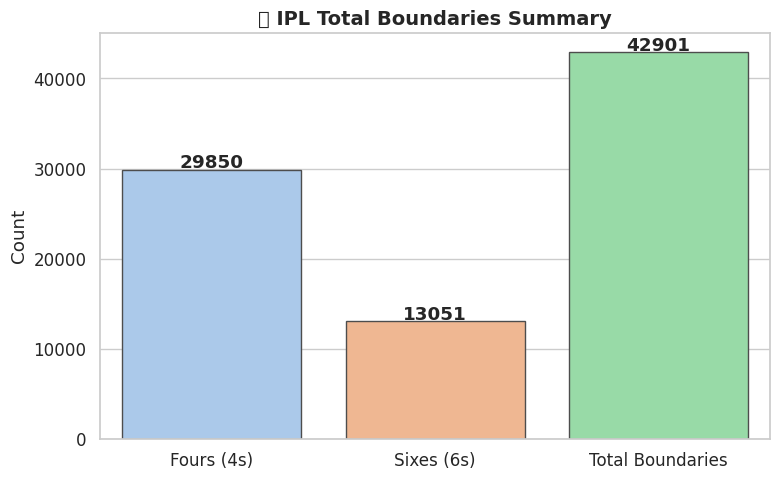

In [ ]:
# Create DataFrame for plotting
boundary_data = pd.DataFrame({
    'Type': ['Fours (4s)', 'Sixes (6s)', 'Total Boundaries'],
    'Count': [total_fours, total_sixes, total_fours + total_sixes]
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=boundary_data, x='Type', y='Count', palette='pastel', edgecolor=".3")

# Annotate counts
for index, row in boundary_data.iterrows():
    plt.text(index, row['Count'] + 200, f"{row['Count']}", ha='center', fontweight='bold')

plt.title("🏏 IPL Total Boundaries Summary", fontsize=14, fontweight='bold')
plt.ylabel("Count")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [ ]:
# Top players by 4s
top_fours = df[df['batsman_runs'] == 4]['batter'].value_counts().head(10)

# Top players by 6s
top_sixes = df[df['batsman_runs'] == 6]['batter'].value_counts().head(10)

print("Top Players by 4s:")
print(top_fours)

print("\nTop Players by 6s:")
print(top_sixes)


Top Players by 4s:
batter
S Dhawan        768
V Kohli         708
DA Warner       663
RG Sharma       599
SK Raina        506
G Gambhir       492
RV Uthappa      481
AM Rahane       479
KD Karthik      466
F du Plessis    422
Name: count, dtype: int64

Top Players by 6s:
batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: count, dtype: int64


In [ ]:
# Calculate separately
fours_by_player = df[df['batsman_runs'] == 4]['batter'].value_counts()
sixes_by_player = df[df['batsman_runs'] == 6]['batter'].value_counts()

# Combine into a DataFrame
boundary_stats = pd.DataFrame({
    "Fours": fours_by_player,
    "Sixes": sixes_by_player
}).fillna(0).astype(int)

# Sort by total boundaries and get top 10
boundary_stats["Total Boundaries"] = boundary_stats["Fours"] + boundary_stats["Sixes"]
top_boundary_players = boundary_stats.sort_values(by="Total Boundaries", ascending=False).head(10)

print(top_boundary_players)


                Fours  Sixes  Total Boundaries
batter                                        
V Kohli           708    273               981
S Dhawan          768    153               921
DA Warner         663    236               899
RG Sharma         599    281               880
CH Gayle          408    359               767
SK Raina          506    204               710
AB de Villiers    414    253               667
RV Uthappa        481    182               663
KD Karthik        466    161               627
MS Dhoni          363    252               615


<ipython-input-105-3555779992>:39: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


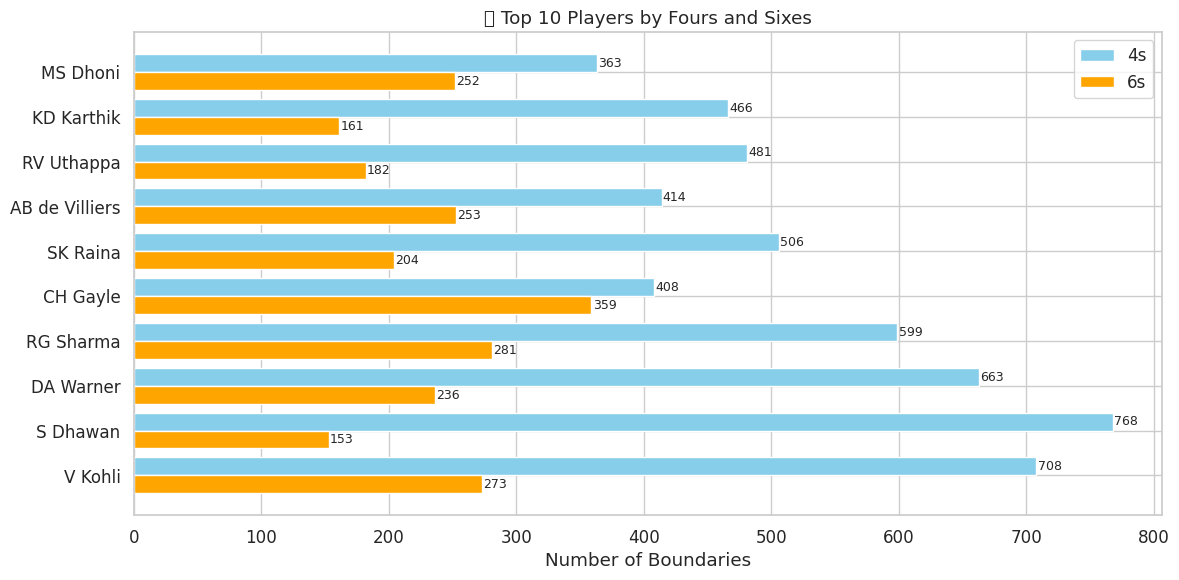

In [ ]:
top_boundary_players = top_boundary_players.reset_index().rename(columns={"index": "Player"})

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)

# Plot grouped bar chart for Fours and Sixes
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(top_boundary_players))

# Plot Fours
plt.barh(
    [i + bar_width for i in x],
    top_boundary_players['Fours'],
    height=bar_width,
    label='4s',
    color='skyblue'
)

# Plot Sixes
plt.barh(
    x,
    top_boundary_players['Sixes'],
    height=bar_width,
    label='6s',
    color='orange'
)

# Add labels
for i, (fours, sixes) in enumerate(zip(top_boundary_players['Fours'], top_boundary_players['Sixes'])):
    plt.text(fours + 1, i + bar_width, str(fours), va='center', fontsize=9)
    plt.text(sixes + 1, i, str(sixes), va='center', fontsize=9)

# Set y-ticks
plt.yticks([i + bar_width / 2 for i in x], top_boundary_players['batter'])
plt.xlabel("Number of Boundaries")
plt.title("🔥 Top 10 Players by Fours and Sixes")
plt.legend()
plt.tight_layout()
plt.show()


Dismissal Types and Their Counts:
dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


<ipython-input-63-3079524535>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_counts.values, y=dismissal_counts.index, palette='Set2')


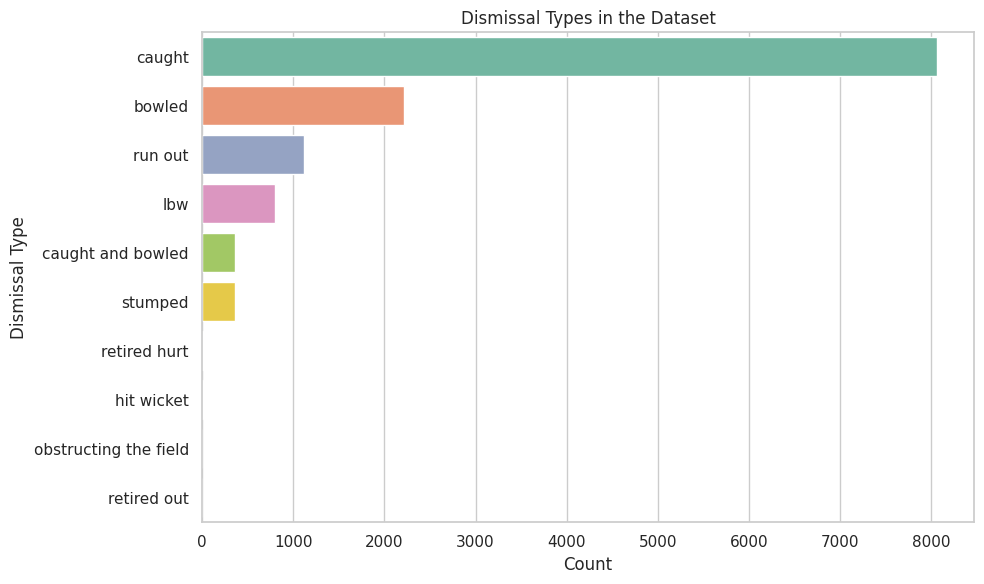

In [ ]:


# Filter only rows where a wicket fell
wickets = df[df['is_wicket'] == 1]

# Count different dismissal types
dismissal_counts = wickets['dismissal_kind'].value_counts()

# Display dismissal types
print("Dismissal Types and Their Counts:")
print(dismissal_counts)

# Optional: Plot the dismissal types
plt.figure(figsize=(10, 6))
sns.barplot(x=dismissal_counts.values, y=dismissal_counts.index, palette='Set2')
plt.title('Dismissal Types in the Dataset')
plt.xlabel('Count')
plt.ylabel('Dismissal Type')
plt.tight_layout()
plt.show()


# Top Batsmen based on Strike Rate and Average

In [ ]:
# 🔹 Step 1: Filter out extras (wides, no-balls) for accurate ball count
legal_deliveries = df[df['extras_type'].isna()]

# 🔹 Step 2: Count balls faced and total runs
balls_faced = legal_deliveries.groupby('batter').size()
total_runs = df.groupby('batter')['batsman_runs'].sum()

# 🔹 Step 3: Calculate matches played per batter
batter_matches = df[['match_id', 'batter']].drop_duplicates()
matches_played = batter_matches.groupby('batter').size()

# 🔹 Step 4: Create stats DataFrame
bat_stats = pd.DataFrame({
    'Runs': total_runs,
    'Balls': balls_faced,
    'Matches': matches_played
})

# 🔹 Step 5: Filter batsmen who faced at least 1000 balls
bat_stats = bat_stats[bat_stats['Balls'] >= 1000]

# 🔹 Step 6: Calculate strike rate
bat_stats['Strike Rate'] = (bat_stats['Runs'] / bat_stats['Balls']) * 100

# 🔹 Step 7: Count dismissals
dismissals = df[df['player_dismissed'].notna()]
dismissal_counts = dismissals['player_dismissed'].value_counts()
bat_stats['Dismissals'] = bat_stats.index.map(dismissal_counts).fillna(0)

# 🔹 Step 8: Calculate batting average
bat_stats['Average'] = bat_stats['Runs'] / bat_stats['Dismissals'].replace(0, pd.NA)

# 🔹 Step 9: Sort and display
top_strike_rate = bat_stats.sort_values(by='Strike Rate', ascending=False).head(10)
top_average = bat_stats.sort_values(by='Average', ascending=False).head(10)

# 🔹 Step 10: Output
print("🔝 Batsmen with Highest Strike Rate (Min 1000 Balls Faced):")
print(top_strike_rate[['Runs', 'Balls', 'Matches', 'Strike Rate']])

print("\n🔝 Batsmen with Highest Average (Min 1000 Balls Faced):")
print(top_average[['Runs', 'Dismissals', 'Matches', 'Average']])


🔝 Batsmen with Highest Strike Rate (Min 1000 Balls Faced):
                Runs   Balls  Matches  Strike Rate
batter                                            
AD Russell      2488  1392.0      104   178.735632
N Pooran        1769  1074.0       72   164.711359
GJ Maxwell      2772  1712.0      128   161.915888
V Sehwag        2728  1691.0      104   161.324660
AB de Villiers  5181  3344.0      170   154.934211
YBK Jaiswal     1607  1045.0       52   153.779904
CH Gayle        4997  3256.0      141   153.470516
KA Pollard      3437  2260.0      168   152.079646
RR Pant         3297  2175.0      110   151.586207
JC Buttler      3583  2373.0      106   150.990308

🔝 Batsmen with Highest Average (Min 1000 Balls Faced):
                Runs  Dismissals  Matches    Average
batter                                              
KL Rahul        4689         105      122  44.657143
RD Gaikwad      2380          57       65  41.754386
DA Warner       6567         164      184  40.042683
AB de Vi

# Bowlers with Lowest Economy Rate (Min 300 Balls) AND Bowlers with Best Bowling Average (Min 300 Balls)

<ipython-input-86-1734390046>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
<ipython-input-86-1734390046>:29: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


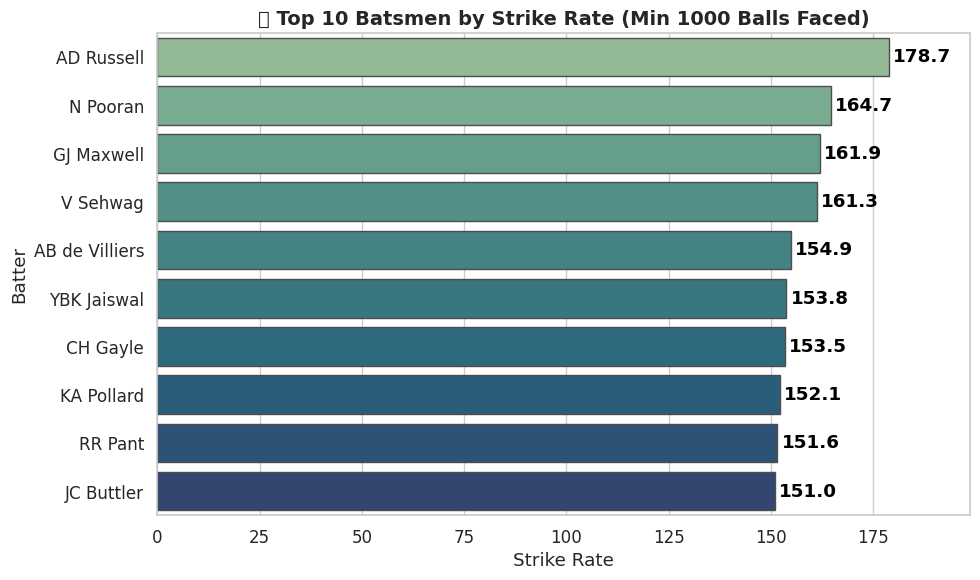

<ipython-input-86-1734390046>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(
<ipython-input-86-1734390046>:50: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


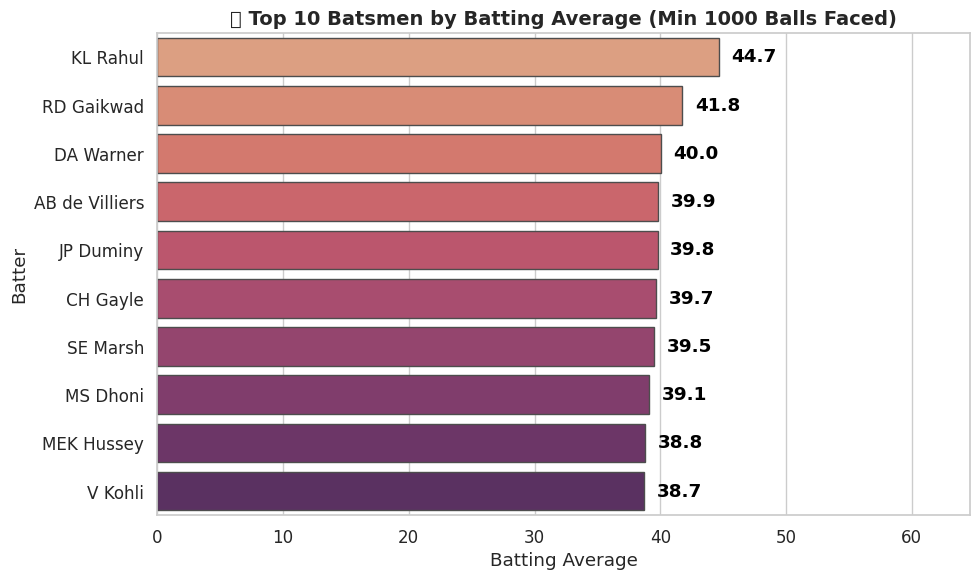

In [ ]:
sns.set(style="whitegrid", font_scale=1.1)

# Use consistent color palette
strike_palette = sns.color_palette("crest", as_cmap=True)
avg_palette = sns.color_palette("flare", as_cmap=True)

# 🔝 Plot: Strike Rate
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(
    x="Strike Rate",
    y=top_strike_rate.index,
    data=top_strike_rate,
    palette="crest",
    edgecolor=".3"
)

# Annotate values
for i, v in enumerate(top_strike_rate["Strike Rate"]):
    ax1.text(v + 1, i, f"{v:.1f}", color='black', va='center', fontweight='bold')

plt.title("🚀 Top 10 Batsmen by Strike Rate (Min 1000 Balls Faced)", fontsize=14, fontweight='bold')
plt.xlabel("Strike Rate")
plt.ylabel("Batter")
plt.xlim(0, top_strike_rate["Strike Rate"].max() + 20)
plt.tight_layout()
plt.show()

# 💯 Plot: Batting Average
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(
    x="Average",
    y=top_average.index,
    data=top_average,
    palette="flare",
    edgecolor=".3"
)

# Annotate values
for i, v in enumerate(top_average["Average"]):
    ax2.text(v + 1, i, f"{v:.1f}", color='black', va='center', fontweight='bold')

plt.title("🎯 Top 10 Batsmen by Batting Average (Min 1000 Balls Faced)", fontsize=14, fontweight='bold')
plt.xlabel("Batting Average")
plt.ylabel("Batter")
plt.xlim(0, top_average["Average"].max() + 20)
plt.tight_layout()
plt.show()


In [ ]:
# Filter out extras that do not count as legal balls
legal_deliveries = df[~df['extras_type'].isin(['wides', 'noballs'])]

# Count balls bowled per bowler
balls_bowled = legal_deliveries.groupby('bowler').size()

# Total runs conceded (including extras)
runs_conceded = df.groupby('bowler')['total_runs'].sum()

# Count wickets (excluding run outs and retired hurt)
valid_dismissals = df[df['dismissal_kind'].isin([
    'bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
wickets = valid_dismissals['bowler'].value_counts()

# Combine into one DataFrame
bowl_stats = pd.DataFrame({
    'Balls': balls_bowled,
    'Runs': runs_conceded,
    'Wickets': wickets
}).fillna(0)

# Filter bowlers with at least 300 balls
bowl_stats = bowl_stats[bowl_stats['Balls'] >= 300]

# Calculate economy and average
bowl_stats['Overs'] = bowl_stats['Balls'] / 6
bowl_stats['Economy'] = bowl_stats['Runs'] / bowl_stats['Overs']
bowl_stats['Average'] = bowl_stats['Runs'] / bowl_stats['Wickets'].replace(0, pd.NA)

# Sort and display top bowlers
top_economy = bowl_stats.sort_values(by='Economy').head(10)
top_average = bowl_stats.sort_values(by='Average').head(10)

print("🔝 Bowlers with Lowest Economy Rate (Min 300 Balls):")
print(top_economy[['Balls', 'Runs', 'Overs', 'Economy']])

print("\n🔝 Bowlers with Best Bowling Average (Min 300 Balls):")
print(top_average[['Balls', 'Wickets', 'Runs', 'Average']])


🔝 Bowlers with Lowest Economy Rate (Min 300 Balls):
                  Balls  Runs       Overs   Economy
bowler                                             
A Kumble            965  1089  160.833333  6.770984
GD McGrath          324   366   54.000000  6.777778
SP Narine          4081  4672  680.166667  6.868905
J Yadav             390   447   65.000000  6.876923
DL Vettori          777   894  129.500000  6.903475
M Muralitharan     1528  1765  254.666667  6.930628
RE van der Merwe    443   515   73.833333  6.975169
Rashid Khan        2872  3340  478.666667  6.977716
MJ Santner          366   428   61.000000  7.016393
J Botha             694   818  115.666667  7.072046

🔝 Bowlers with Best Bowling Average (Min 300 Balls):
                Balls  Wickets  Runs    Average
bowler                                         
M Pathirana       451     34.0   617  18.147059
L Ngidi           324     25.0   460  18.400000
AD Mascarenhas    308     19.0   365  19.210526
DE Bollinger      576     37.0

<ipython-input-100-2355351331>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
<ipython-input-100-2355351331>:25: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


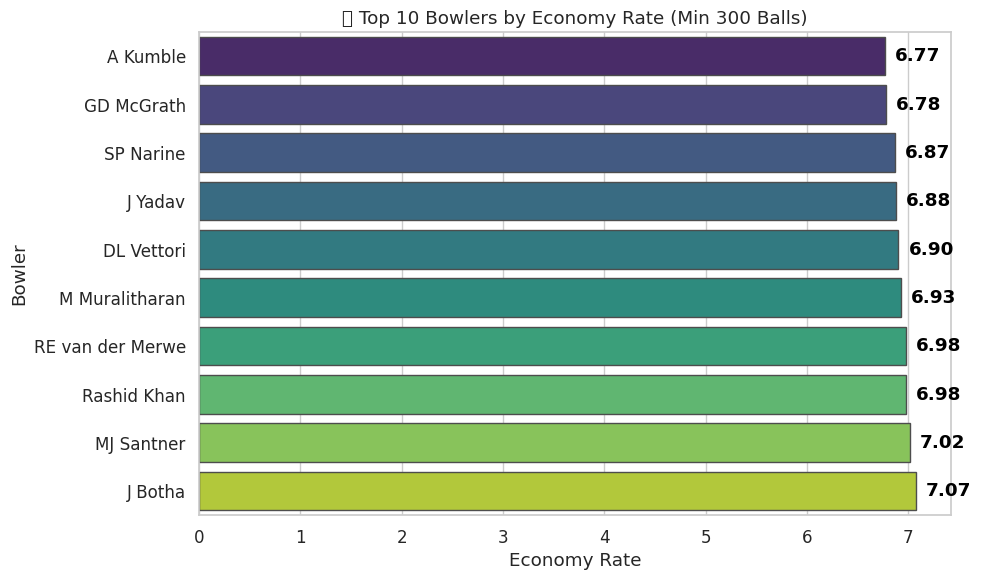

<ipython-input-100-2355351331>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(
<ipython-input-100-2355351331>:45: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


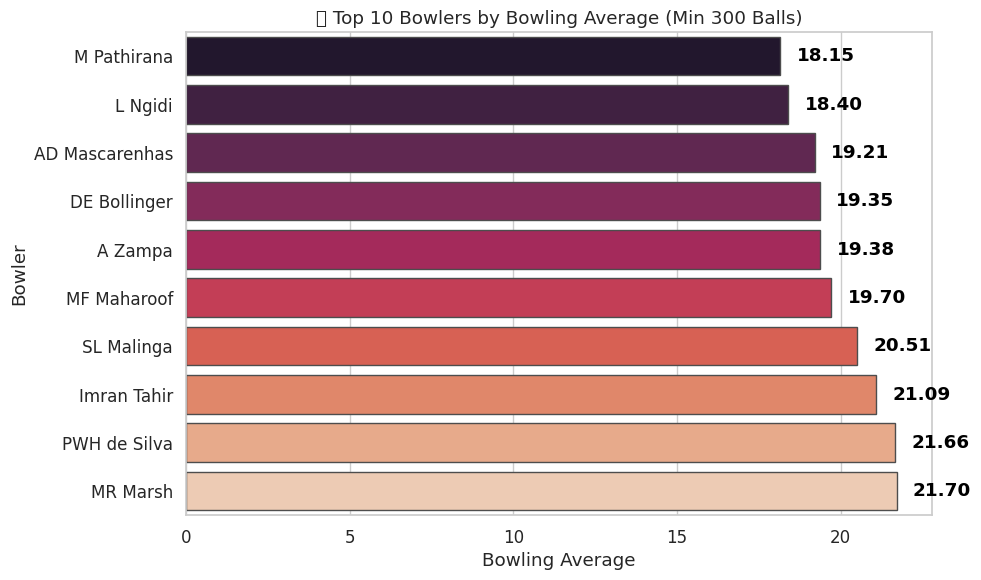

In [ ]:
# Reset index and rename the new column for plotting
top_economy = top_economy.reset_index().rename(columns={'index': 'bowler'})
top_average = top_average.reset_index().rename(columns={'index': 'bowler'})

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)

# 📊 Plot: Top 10 Bowlers by Lowest Economy
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(
    x="Economy",
    y="bowler",
    data=top_economy,
    palette="viridis",
    edgecolor=".3"
)

# Annotate values
for i, v in enumerate(top_economy["Economy"]):
    ax1.text(v + 0.1, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

plt.title("🛡️ Top 10 Bowlers by Economy Rate (Min 300 Balls)")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

# 📊 Plot: Top 10 Bowlers by Best Average
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(
    x="Average",
    y="bowler",
    data=top_average,
    palette="rocket",
    edgecolor=".3"
)

# Annotate values
for i, v in enumerate(top_average["Average"]):
    ax2.text(v + 0.5, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

plt.title("🎯 Top 10 Bowlers by Bowling Average (Min 300 Balls)")
plt.xlabel("Bowling Average")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

# Matchup: Batsman VS Bowler

In [ ]:
# 🎯 Define the batter and bowler you want to analyze
batter_name = "AB de Villiers"
bowler_name = "JJ Bumrah"

# 🎯 Filter data for this specific batter vs bowler
matchup_df = df[(df['batter'] == batter_name) & (df['bowler'] == bowler_name)]

# 🧮 Calculate stats
runs_scored = matchup_df['batsman_runs'].sum()
balls_faced = matchup_df.shape[0]
dismissals = matchup_df[matchup_df['player_dismissed'] == batter_name].shape[0]

# Avoid division by zero
strike_rate = (runs_scored / balls_faced) * 100 if balls_faced > 0 else 0

# 🖨️ Print results
print(f"📊 Matchup: {batter_name} vs {bowler_name}")
print(f"➡️ Runs Scored: {runs_scored}")
print(f"➡️ Balls Faced: {balls_faced}")
print(f"➡️ Dismissals: {dismissals}")
print(f"➡️ Strike Rate: {strike_rate:.2f}")


📊 Matchup: AB de Villiers vs JJ Bumrah
➡️ Runs Scored: 131
➡️ Balls Faced: 90
➡️ Dismissals: 3
➡️ Strike Rate: 145.56


# Top Clutch Batters in Death Overs (16–20) – Sorted by Strike Rate

In [ ]:
# Filter only death overs (16 to 20)
death_overs_df = df[(df['over'] >= 16) & (df['over'] <= 20)]

# Group by batter: total runs and balls faced
death_stats = death_overs_df.groupby('batter').agg(
    runs_in_death=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

# Calculate strike rate
death_stats['strike_rate'] = (death_stats['runs_in_death'] / death_stats['balls_faced']) * 100

# Filter batters who faced at least 60 balls in death overs
qualified = death_stats[death_stats['balls_faced'] >= 60]

# Sort by strike rate in descending order
top_clutch_by_sr = qualified.sort_values(by='strike_rate', ascending=False).head(10)

# Display results
print("🔥 Top Clutch Batters in Death Overs (16–20) – Sorted by Strike Rate")
print(top_clutch_by_sr[['batter', 'runs_in_death', 'balls_faced', 'strike_rate']])


🔥 Top Clutch Batters in Death Overs (16–20) – Sorted by Strike Rate
             batter  runs_in_death  balls_faced  strike_rate
529        T Stubbs            233           85   274.117647
24   AB de Villiers           1421          635   223.779528
301      MA Agarwal            188           86   218.604651
513  Shashank Singh            158           75   210.666667
87      BB McCullum            158           78   202.564103
283  LS Livingstone            204          103   198.058252
405        R Powell            193           98   196.938776
432         RR Pant            626          318   196.855346
104        CH Gayle            404          209   193.301435
550         V Kohli           1099          571   192.469352


<ipython-input-116-3821365801>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-116-3821365801>:29: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


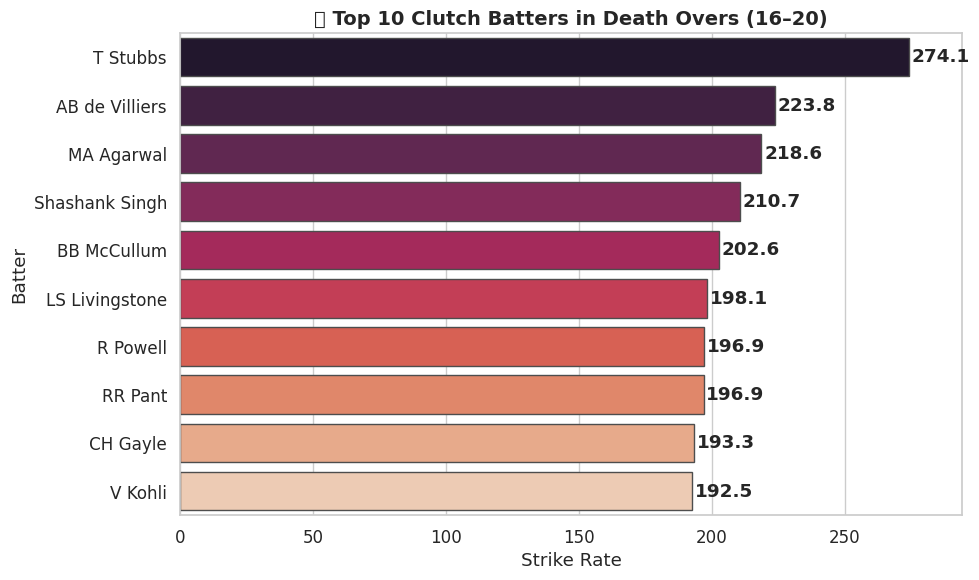

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and reset index
top_clutch_by_sr = top_clutch_by_sr.reset_index(drop=True)

# Plot setup
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.1)

# Create the barplot
ax = sns.barplot(
    data=top_clutch_by_sr,
    x='strike_rate',
    y='batter',
    palette='rocket',
    edgecolor='.3'
)

# Annotate the bars
for i, row in top_clutch_by_sr.iterrows():
    ax.text(row['strike_rate'] + 1, i, f"{row['strike_rate']:.1f}", va='center', fontweight='bold')

# Final touches
plt.title("🔥 Top 10 Clutch Batters in Death Overs (16–20)", fontsize=14, fontweight='bold')
plt.xlabel("Strike Rate")
plt.ylabel("Batter")
plt.xlim(0, top_clutch_by_sr['strike_rate'].max() + 20)  # Ensure axis covers all bars
plt.tight_layout()
plt.show()


# Top 10 Bowlers by Dot Ball Percentage (Min 1000 Balls Bowled)

In [ ]:
# Add dot ball flag (total_runs == 0)
df['is_dot'] = df['total_runs'].apply(lambda x: 1 if x == 0 else 0)

# Group by bowler
bowler_stats = df.groupby('bowler').agg(
    dot_balls=('is_dot', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

# Compute dot ball percentage
bowler_stats['dot_ball_percentage'] = (bowler_stats['dot_balls'] / bowler_stats['total_balls']) * 100

# Filter for bowlers with at least 1000 balls bowled
qualified_bowlers = bowler_stats[bowler_stats['total_balls'] >= 1000]

# Sort by dot ball percentage
top_dot_bowlers = qualified_bowlers.sort_values(by='dot_ball_percentage', ascending=False).head(10)

# Display results
print("🎯 Top 10 Bowlers by Dot Ball Percentage (Min 1000 Balls Bowled)")
print(top_dot_bowlers[['bowler', 'dot_balls', 'total_balls', 'dot_ball_percentage']])


🎯 Top 10 Bowlers by Dot Ball Percentage (Min 1000 Balls Bowled)
         bowler  dot_balls  total_balls  dot_ball_percentage
138    DW Steyn       1019         2282            44.653812
289    MM Patel        590         1382            42.691751
262    M Morkel        708         1699            41.671572
279  MG Johnson        535         1301            41.122214
335     P Kumar       1075         2637            40.766022
483    TA Boult        986         2428            40.609555
129   DL Chahar        708         1746            40.549828
10      A Nehra        798         1974            40.425532
71      B Kumar       1632         4060            40.197044
168    I Sharma        969         2429            39.892960


# Top Batters Under Pressure (Overs 16–20 while Chasing, Min 500 Balls Faced)

In [ ]:
# Filter for pressure situations: 2nd innings (chasing) + overs 16–20
pressure_df = df[(df['inning'] == 2) & (df['over'] >= 16)]

# Group by batter to calculate runs and balls faced
pressure_stats = pressure_df.groupby('batter').agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

# Calculate strike rate
pressure_stats['strike_rate'] = (pressure_stats['runs_scored'] / pressure_stats['balls_faced']) * 100

# Filter batters with at least 500 balls faced in death overs while chasing
qualified = pressure_stats[pressure_stats['balls_faced'] >= 200]

# Sort by strike rate
top_pressure_players = qualified.sort_values(by='strike_rate', ascending=False).head(10)

# Display results
print("🔥 Top Batters Under Pressure (Overs 16–20 while Chasing, Min 500 Balls Faced)")
print(top_pressure_players[['batter', 'runs_scored', 'balls_faced', 'strike_rate']])


🔥 Top Batters Under Pressure (Overs 16–20 while Chasing, Min 500 Balls Faced)
             batter  runs_scored  balls_faced  strike_rate
21   AB de Villiers          464          221   209.954751
207      KA Pollard          641          351   182.621083
359       R Tewatia          368          206   178.640777
109       DA Miller          542          307   176.547231
479         V Kohli          363          207   175.362319
212      KD Karthik          570          329   173.252280
284        MS Dhoni         1088          628   173.248408
499       YK Pathan          410          238   172.268908
366       RG Sharma          441          260   169.615385
27       AD Russell          349          208   167.788462


# Top 10 Run Scorers While Chasing (2nd Innings)

In [ ]:
# Filter for 2nd innings only (chasing team)
chasing_df = df[df['inning'] == 2]

# Group by batter and sum runs
chasing_runs = chasing_df.groupby('batter')['batsman_runs'].sum().reset_index()

# Sort by total runs in descending order
top_chasers = chasing_runs.sort_values(by='batsman_runs', ascending=False).head(10)

# Display results
print("🏃‍♂️ Top 10 Run Scorers While Chasing (2nd Innings)")
print(top_chasers.rename(columns={'batter': 'Player', 'batsman_runs': 'Runs While Chasing'}))


🏃‍♂️ Top 10 Run Scorers While Chasing (2nd Innings)
         Player  Runs While Chasing
581     V Kohli                3604
134   DA Warner                3285
435   RG Sharma                3028
468    S Dhawan                2843
457  RV Uthappa                2832
176   G Gambhir                2460
501    SK Raina                2334
261    KL Rahul                2310
527   SV Samson                2302
47    AM Rahane                2248


#Top 10 Batters Who Played the Most Dot Balls

In [ ]:
# Filter only dot balls (no runs scored on that ball)
dot_balls = df[df['total_runs'] == 0]

# Count number of dot balls per batter
dot_ball_counts = dot_balls['batter'].value_counts().reset_index()
dot_ball_counts.columns = ['Player', 'Dot Balls']

# Get the top 10 players who played the most dot balls
top_dot_ball_players = dot_ball_counts.head(10)

# Display results
print("🛑 Top 10 Batters Who Played the Most Dot Balls")
print(top_dot_ball_players)


🛑 Top 10 Batters Who Played the Most Dot Balls
       Player  Dot Balls
0     V Kohli       1967
1    S Dhawan       1879
2   RG Sharma       1852
3   DA Warner       1628
4  RV Uthappa       1388
5    CH Gayle       1387
6   AM Rahane       1305
7    SK Raina       1276
8    MS Dhoni       1203
9   G Gambhir       1170


#Top 10 Players Who Faced the Most Balls


In [ ]:
balls_faced = df['batter'].value_counts().reset_index()
balls_faced.columns = ['Player', 'Balls Faced']

# Get top 10 players who faced the most balls
top_ball_faced_players = balls_faced.head(10)

# Display results
print("🏏 Top 10 Players Who Faced the Most Balls")
print(top_ball_faced_players)

🏏 Top 10 Players Who Faced the Most Balls
       Player  Balls Faced
0     V Kohli         6236
1    S Dhawan         5483
2   RG Sharma         5183
3   DA Warner         4849
4    SK Raina         4177
5    MS Dhoni         3947
6  RV Uthappa         3927
7   AM Rahane         3858
8  KD Karthik         3687
9    KL Rahul         3578


<ipython-input-122-3089530493>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-122-3089530493>:28: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


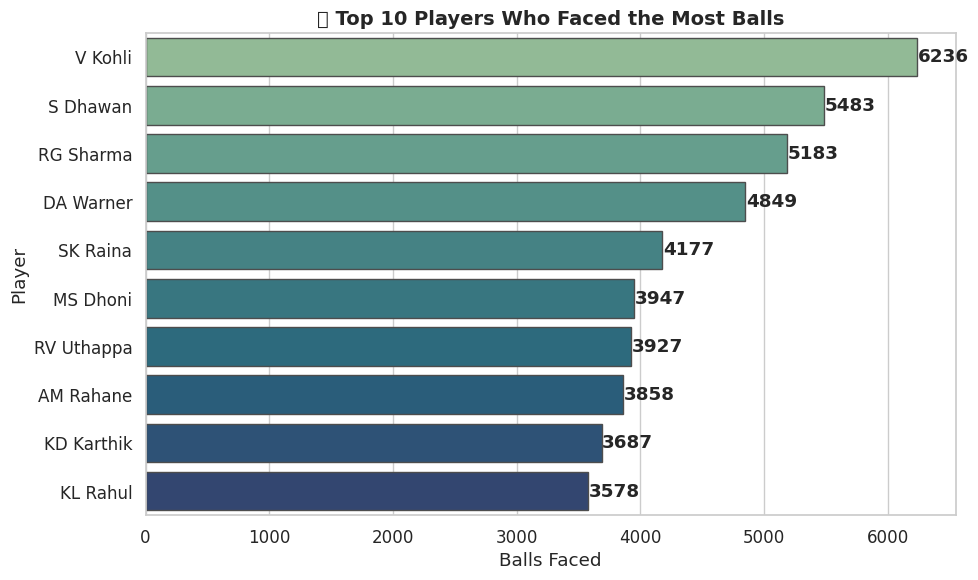

In [ ]:
# Sort in descending order for better visual
top_ball_faced_players = top_ball_faced_players.sort_values(by='Balls Faced', ascending=False)

# Plot settings
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Horizontal bar plot
ax = sns.barplot(
    data=top_ball_faced_players,
    x='Balls Faced',
    y='Player',
    palette='crest',
    edgecolor=".3"
)

# Annotate values
for i, row in top_ball_faced_players.iterrows():
    ax.text(row['Balls Faced'] + 5, i, f"{row['Balls Faced']}", va='center', fontweight='bold')

# Titles and labels
plt.title("🏏 Top 10 Players Who Faced the Most Balls", fontsize=14, fontweight='bold')
plt.xlabel("Balls Faced")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


# Average Total Score Per Team (per innings)

In [ ]:
# Step 1: Calculate total score per innings per match
innings_totals = df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Step 2: Calculate average total per team
team_avg_totals = innings_totals.groupby('batting_team')['total_runs'].mean().reset_index()

# Rename columns
team_avg_totals.columns = ['Team', 'Average Total Score']

# Sort by average total in descending order
team_avg_totals = team_avg_totals.sort_values(by='Average Total Score', ascending=False)

# Display result
print("📊 Average Total Score Per Team (per innings)")
print(team_avg_totals)


📊 Average Total Score Per Team (per innings)
                           Team  Average Total Score
17  Royal Challengers Bengaluru           195.333333
5                Gujarat Titans           172.377778
9          Lucknow Super Giants           170.681818
12                 Punjab Kings           170.285714
0           Chennai Super Kings           162.306723
10               Mumbai Indians           158.556391
2                Delhi Capitals           158.510638
4                 Gujarat Lions           156.838710
18          Sunrisers Hyderabad           156.295699
13             Rajasthan Royals           155.816143
16  Royal Challengers Bangalore           155.111111
14       Rising Pune Supergiant           154.375000
8         Kolkata Knight Riders           154.239216
6               Kings XI Punjab           154.174359
1               Deccan Chargers           152.840000
3              Delhi Daredevils           149.975309
15      Rising Pune Supergiants           147.357143
1

# Teams with Most 200+ Scores in an Innings

In [ ]:
# Step 1: Calculate total score per innings per match
innings_totals = df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Step 2: Filter innings with 200+ total
high_scores = innings_totals[innings_totals['total_runs'] >= 200]

# Step 3: Count how many times each team scored 200+
team_200_counts = high_scores['batting_team'].value_counts().reset_index()
team_200_counts.columns = ['Team', '200+ Scores']

# Sort descending
team_200_counts = team_200_counts.sort_values(by='200+ Scores', ascending=False)

# Display results
print("🔥 Teams with Most 200+ Scores in an Innings")
print(team_200_counts)


🔥 Teams with Most 200+ Scores in an Innings
                           Team  200+ Scores
0           Chennai Super Kings           32
1         Kolkata Knight Riders           25
2                Mumbai Indians           25
3   Royal Challengers Bangalore           24
4              Rajasthan Royals           21
5           Sunrisers Hyderabad           21
6               Kings XI Punjab           14
7                Delhi Capitals           11
8                  Punjab Kings           10
9                Gujarat Titans            8
10         Lucknow Super Giants            7
11  Royal Challengers Bengaluru            6
12             Delhi Daredevils            5
13              Deccan Chargers            1
14                Gujarat Lions            1


<ipython-input-121-1464073856>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-121-1464073856>:28: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


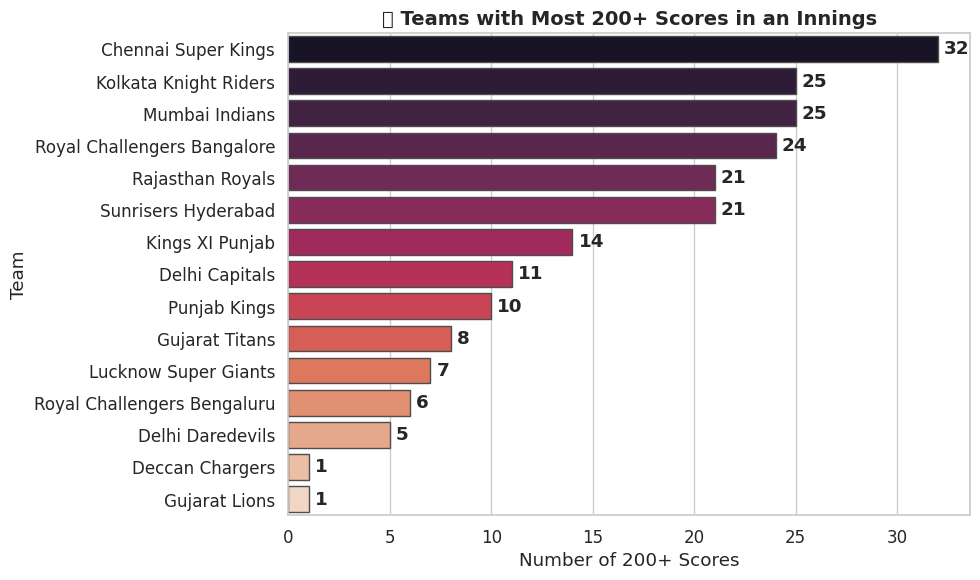

In [ ]:
# Sort in descending order so top team is at the top
team_200_counts = team_200_counts.sort_values(by='200+ Scores', ascending=False)

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Horizontal bar chart
ax = sns.barplot(
    x='200+ Scores',
    y='Team',
    data=team_200_counts,
    palette='rocket',
    edgecolor='.3'
)

# Annotate bars
for i, row in team_200_counts.iterrows():
    ax.text(row['200+ Scores'] + 0.3, i, f"{row['200+ Scores']}", va='center', fontweight='bold')

# Add titles and labels
plt.title("🔥 Teams with Most 200+ Scores in an Innings", fontsize=14, fontweight='bold')
plt.xlabel("Number of 200+ Scores")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


# Most Matches Played by a Player

In [ ]:

# Get total number of matches
total_matches = df['match_id'].nunique()

# Create a player → match_id mapping from all player columns
batter_matches = df[['match_id', 'batter']].rename(columns={'batter': 'player'})
bowler_matches = df[['match_id', 'bowler']].rename(columns={'bowler': 'player'})
non_striker_matches = df[['match_id', 'non_striker']].rename(columns={'non_striker': 'player'})
dismissed_matches = df[['match_id', 'player_dismissed']].dropna().rename(columns={'player_dismissed': 'player'})

# Combine all appearances
all_appearances = pd.concat([
    batter_matches,
    bowler_matches,
    non_striker_matches,
    dismissed_matches
])

# Drop duplicates to count each player only once per match
unique_appearances = all_appearances.drop_duplicates()

# Count number of matches per player
player_match_counts = unique_appearances['player'].value_counts().reset_index()
player_match_counts.columns = ['Player', 'Matches Played']

# Calculate percentage
player_match_counts['% of Total Matches'] = (player_match_counts['Matches Played'] / total_matches) * 100

# Display top 10
print("🏏 Top 10 Players by Matches Played and Participation Percentage")
print(player_match_counts.head(10))


🏏 Top 10 Players by Matches Played and Participation Percentage
       Player  Matches Played  % of Total Matches
0   RG Sharma             252           23.013699
1     V Kohli             245           22.374429
2  KD Karthik             234           21.369863
3   RA Jadeja             233           21.278539
4    MS Dhoni             229           20.913242
5    S Dhawan             221           20.182648
6    R Ashwin             208           18.995434
7    SK Raina             200           18.264840
8  RV Uthappa             197           17.990868
9   PP Chawla             192           17.534247


<ipython-input-119-2605560575>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-119-2605560575>:29: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


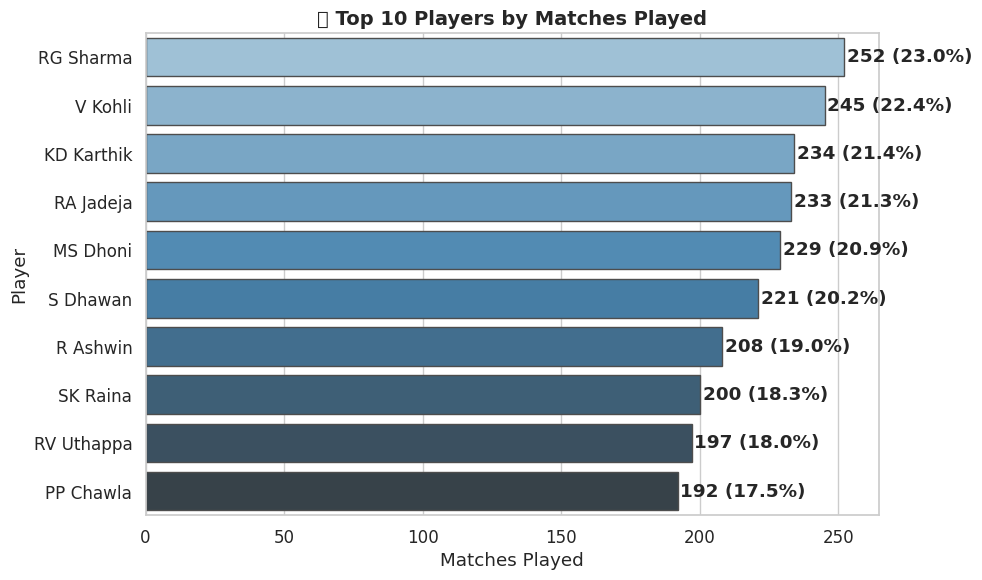

In [ ]:
# Sort descending so top player is on top
top_matches = player_match_counts.head(10).sort_values(by='Matches Played', ascending=False)

# Plot setup
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.1)

# Horizontal bar chart
ax = sns.barplot(
    data=top_matches,
    x="Matches Played",
    y="Player",
    palette="Blues_d",
    edgecolor=".3"
)

# Annotate matches played and percentage
for i, row in top_matches.iterrows():
    ax.text(row['Matches Played'] + 1, i, f"{row['Matches Played']} ({row['% of Total Matches']:.1f}%)",
            va='center', fontweight='bold')

# Title and labels
plt.title("🏏 Top 10 Players by Matches Played", fontsize=14, fontweight='bold')
plt.xlabel("Matches Played")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


# CONCLUSION


* Highest Runs: Virat Kohli
* Highest wickets:YS Chahal
* Highest matches:RG Sharma


